<a href="https://colab.research.google.com/github/abhay-ugale-25/web_server_analysis/blob/main/web_server_logs_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Web Server Logs Analysis
------------------------
Reads synthetic log data, executes SQL queries using DuckDB,
and generates visualizations for insights.

Queries:
1. Total number of logs
2. Status code distribution
3. Top 10 requested endpoints
4. Requests by HTTP method
5. Requests per hour
6. Response time distribution

In [15]:
from google.colab import files
uploaded = files.upload()

In [9]:
!pip install duckdb

In [10]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
con = duckdb.connect(database=':memory')

con.execute(
    """
    CREATE TABLE web_server_logs AS
    SELECT * FROM read_csv_auto('web_server_logs.csv')
    """
)

In [12]:
con.execute("SELECT * FROM web_server_logs LIMIT 10").fetch_df()

,timestamp,ip_address,method,endpoint,status_code,response_time_ms
0,2025-09-03 09:11:21,192.168.132,PUT,/products,403,1270
1,2025-09-03 01:16:15,192.168.16,PUT,/cart,403,1634
2,2025-09-03 08:01:40,192.168.144,GET,/products,403,804
3,2025-09-03 11:15:37,192.168.113,POST,/checkout,200,1320
4,2025-09-03 11:37:46,192.168.150,GET,/profile,401,756
5,2025-09-03 07:13:56,192.168.145,GET,/cart,400,1176
6,2025-09-03 12:46:45,192.168.13,GET,/,400,99
7,2025-09-03 07:42:59,192.168.125,GET,/,201,391
8,2025-09-03 21:57:04,192.168.143,POST,/checkout,403,406
9,2025-09-03 15:09:28,192.168.124,GET,/products,500,1861


In [ ]:
# 1. Total number of log entries

con.execute("SELECT COUNT(*) AS TOTAL_LOGS FROM web_server_logs").fetchdf()

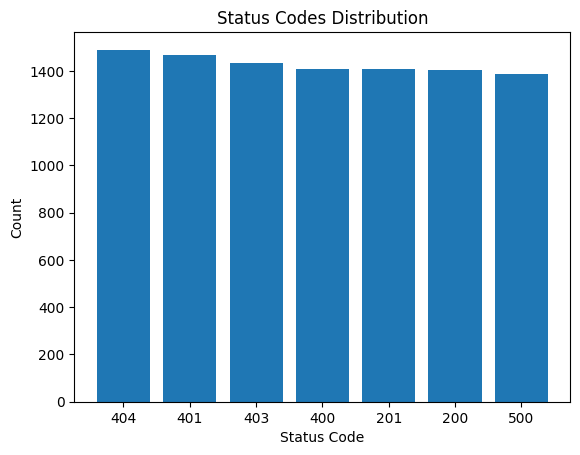

In [54]:
# 2. Status codes distribution

df_status = con.execute(
    """
    SELECT status_code, COUNT(*) AS count
    FROM web_server_logs
    GROUP BY status_code
    ORDER BY count DESC;
    """
).fetchdf()

plt.bar(df_status['status_code'].astype(str), df_status['count'])
plt.xlabel('Status Code')
plt.ylabel('Count')
plt.title('Status Codes Distribution')
plt.show()

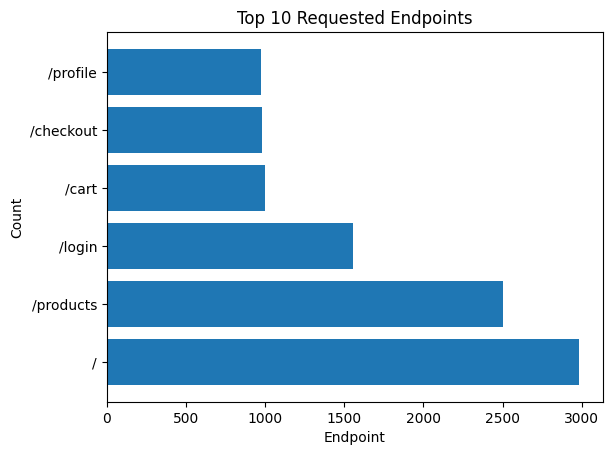

In [48]:
# 3. Requested endpoint

df_endpoint = con.execute(
    """
    SELECT endpoint, COUNT(*) AS count
    FROM web_server_logs
    GROUP BY endpoint
    ORDER BY count DESC;
    """
).fetchdf()

plt.barh(df_endpoint['endpoint'], df_endpoint['count'])
plt.xlabel('Endpoint')
plt.ylabel('Count')
plt.title('Requested Endpoints')
plt.show()

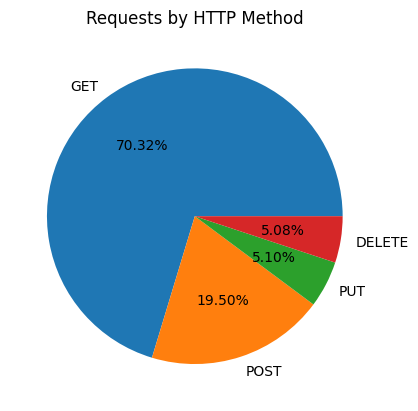

In [47]:
# 4. Requests by HTTP method

df_method = con.execute(
    """
    SELECT method, COUNT(*) AS count
    FROM web_server_logs
    GROUP BY method
    ORDER BY count DESC;
    """
).fetchdf()

plt.pie(df_method['count'], labels=df_method['method'], autopct='%1.2f%%')
plt.title('Requests by HTTP Method')
plt.show()

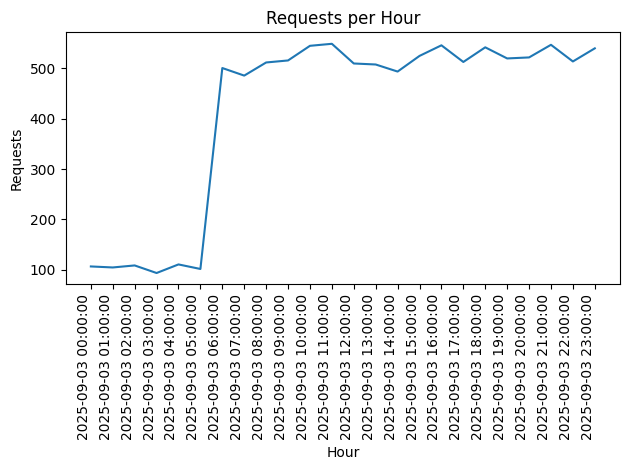

In [46]:
# 5. Requests per hour

plt_request = con.execute(
    """
    SELECT strftime(timestamp, '%Y-%m-%d %H:00:00') AS hour, COUNT(*) AS requests
    FROM web_server_logs
    GROUP BY hour
    ORDER BY hour;
    """
).fetchdf()

plt.plot(plt_request['hour'], plt_request['requests'])
plt.xlabel('Hour')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Requests')
plt.title('Requests per Hour')
plt.tight_layout()
plt.show()

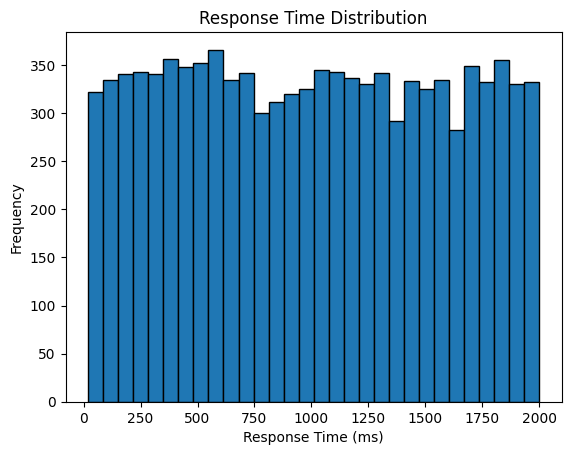

In [52]:
# 6. Response Time Distribution

df_response = con.execute(
    """
    SELECT response_time_ms
    FROM web_server_logs
    """
).fetchdf()

plt.hist(df_response['response_time_ms'], bins=30, edgecolor = 'black')
plt.xlabel('Response Time (ms)')
plt.ylabel('Frequency')
plt.title('Response Time Distribution')
plt.show()